# Demandes de Julie : CONTINGENCE

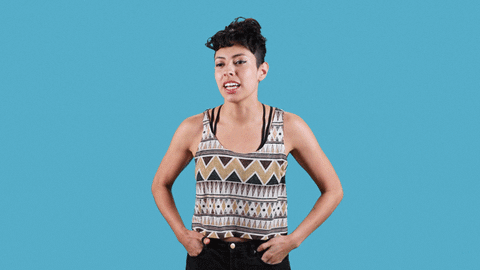

# Est-ce qu'il existe un lien entre le genre d'un client et les catégories de livres achetées ?

Pour répondre à cette question, on utilisera le df **reelles_transactions**

In [198]:
reelles_transactions.head()

id_prod                       date session_id client_id sex   birth  \
0       0_1259 2021-03-01 00:01:07.843138        s_1     c_329   f 1967.00   
24436   0_1390 2021-03-01 00:02:26.047414        s_2     c_664   m 1960.00   
55326   0_1352 2021-03-01 00:02:38.311413        s_3     c_580   m 1988.00   
141505  0_1458 2021-03-01 00:04:54.559692        s_4    c_7912   f 1989.00   
73894   0_1358 2021-03-01 00:05:18.801198        s_5    c_2033   f 1956.00   

        price  categ  year  month  day   age  age_range  
0       11.99   0.00  2021      3    1 55.00   (35, 55]  
24436   19.37   0.00  2021      3    1 62.00  (55, 110]  
55326    4.50   0.00  2021      3    1 34.00   (25, 35]  
141505   6.55   0.00  2021      3    1 33.00   (25, 35]  
73894   16.49   0.00  2021      3    1 66.00  (55, 110]

Ce qu'on va faire dans un premier temps, c'est **créer une représentation graphique du nombre d'achat par catégorie de produits tout en discretisant ces achat en fonction du sexe.**

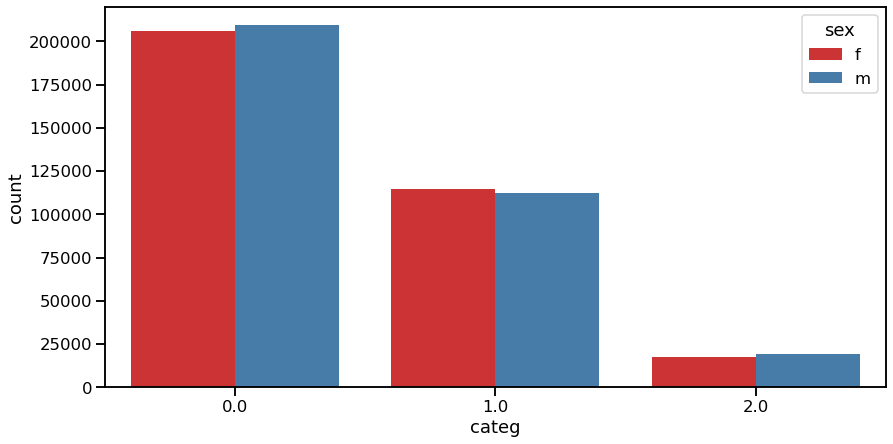

In [200]:
sns.countplot(x="categ", hue="sex", data = reelles_transactions);

On voit ci dessus un **diagramme en barre**, avec **les achats de nos clients** hommes et femmes en fonctions de la **catégorie de produit**. Il ne semble pas y avoir de grande différences dans le comportement des client en fonction de leur sexe par rapport à une plusieurs catégorie de produit.
Si on s'arretait à ce graphique **on pourrait conclure qu'il n'existe aucune corrélation entre le sexe des clients et la catégorie de produit acheté.** 
On va **creuser un peu plus en utilisant le test du Chi² afin de vérifier cette hypothèse.**
L'un des préliminaire au **test d'indépendance Chi²** est de poser les hypothèse nulle et alternative respectivement notées **H0 et Ha.**

H0 est l'hypothèse qui n'admet pas la correlation
Quant à Ha c'est celle qui au contraire l'admet .

H0 pourrait être formulé comme suit : **Il n'y a pas de lien entre le sexe d'un client et la catégorie de livre achetée**
Ha pourrait être formulé comme suit : **Il y a un lien entre le sexe d'un client et la catégorie de livre achetée**

Prochaine étape : Créer un tableau de contngence entre les variable catégorie et sexe grace à la méthode .crosstab()

In [264]:
cont_table=pd.crosstab(reelles_transactions["categ"],reelles_transactions["sex"])

In [265]:
cont_table

sex         f       m
categ                
0.00   206220  209460
1.00   114899  112270
2.00    17283   19200

Ce tableau ne fait que reprendre sous forme d'un df **les résultats de la représentation graphique.**
Prochaine étape : **Le test de Chi². Ce qu'on recherche ici c'est la p-valeur, si cette dernière est supérieure à 0.05 alors l'hypothèse nulle ne pourra pas être rejetée.**
Nous utiliserons la méthode **.chi2_contingency()** du module stats. On enregistrera la valeur de la P-valeur dans une variable pval.

In [266]:
chi2, pval, dof, expected =stats.chi2_contingency(cont_table,correction=True)

Appelons maintenant la variable **pval** pour en connaitre la valeur

In [212]:
pval

1.1989607410166063e-32

Cette dernière est **bien inférieure à 5%.** On peut **rejeter très largement L'hypothèse nulle** selon laquelle il n'y aurait aucun **lien entre le sexe des client et la catégorie de livre achetée.**

# Exite t-il un lien entre l’âge des clients et le montant total des achats ?

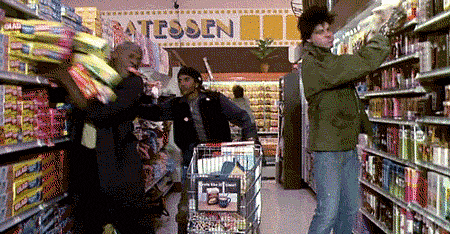

Pour répondre à cette question il va falloir se soumettre à un travail préliminaire. Il faudra tout d'abord connaitre **le Chiffre d'affaire** en fonction de l'age des clients. Pour ce faire on l'association de méthode **.groupby()** et **.sum()**.On enregistera le df dans une variable **tot_ca_age**

In [151]:
#age = reelles_transactions.groupby(["age"])["client_id"].count()
#ge

In [153]:
tot_ca_age = reelles_transactions.groupby(["age"])["price"].sum()
tot_ca_age=tot_ca_age.to_frame("CA par age").reset_index()
tot_ca_age.set_index("age").reset_index()

age  CA par age
0  19.00   609013.69
1  20.00   178195.78
2  21.00   184207.32
3  22.00   178497.70
4  23.00   165027.96
..   ...         ...
71 90.00     5264.34
72 91.00     5043.19
73 92.00     2815.45
74 93.00     4013.87
75 94.00     3221.85

[76 rows x 2 columns]

Ci-dessus un df avec **pour chaque age le CA généré.**

Etant donné qu'il s'agit d'un Test d'association entre deux variables quantitatives nous utiliserons **le test de Spearman .**
Le **rho de Spearman** varie entre 1 et -1. S'il n'y a pas de relation entre les variable le **rho sera égal à 0.** Si **le rho est negatif** la relation l'est tout autant et inversement.
Pour determiner la force de la relation on regarde **la valeur absolue** (c'est à dire le chiffre sans le signe négatif ).

Ci dessou un tableau d'interpretation du **rho de Spearman :**

|\|ρ\|| Interpretation|
|-------|---------------|
|0.00 < 0.10| Negligeable|
|0.10 < 0.20 |Faible|
|0.20 < 0.40| Moderé|
|0.40 < 0.60| Relativement fort|
|0.60 < 0.80| Fort|
|0.80 <= 1.00| Très fort|

Pour procéder au test on va simplement utiliser la méthode **.corr() de pandas avec le paramètre method = "spearman"**

In [155]:
tot_ca_age.corr(method="spearman")

age  CA par age
age         1.00       -0.86
CA par age -0.86        1.00

Ok ! Ce qu'on peut voir  c'est un lien très fort et négatif. En gros plus l'age augmente moins le client achète.
Passon à la représentation graphique de cette relation entre l'age et le montant total des achats avec un nuage de point

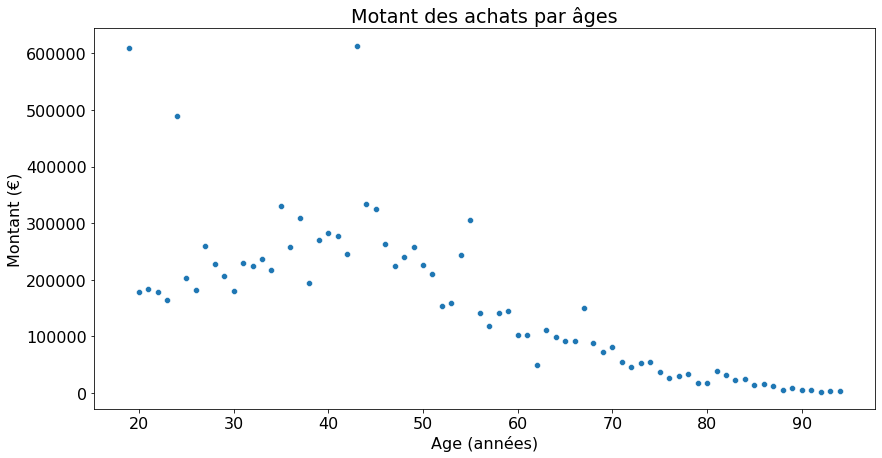

In [269]:
sns.scatterplot(data= tot_ca_age, y= "CA par age", x ="age")
plt.ylabel("Montant (€)")
plt.xlabel("Age (années)")
plt.title("Motant des achats par âges")
plt.show()

Ce qui était vérifié avec le Test de Spearman **est maintenant illustré.**

# Existe t-il un lien entre la fréquence d’achat et l'age du client ?

Pour répondre à cette question nous utliserons encore le df reelles_transactions.

In [178]:
reelles_transactions.head()

id_prod                       date session_id client_id sex   birth  \
0       0_1259 2021-03-01 00:01:07.843138        s_1     c_329   f 1967.00   
24436   0_1390 2021-03-01 00:02:26.047414        s_2     c_664   m 1960.00   
55326   0_1352 2021-03-01 00:02:38.311413        s_3     c_580   m 1988.00   
141505  0_1458 2021-03-01 00:04:54.559692        s_4    c_7912   f 1989.00   
73894   0_1358 2021-03-01 00:05:18.801198        s_5    c_2033   f 1956.00   

        price  categ  year  month  day   age  age_range  
0       11.99   0.00  2021      3    1 56.00  (55, 110]  
24436   19.37   0.00  2021      3    1 63.00  (55, 110]  
55326    4.50   0.00  2021      3    1 35.00   (25, 35]  
141505   6.55   0.00  2021      3    1 34.00   (25, 35]  
73894   16.49   0.00  2021      3    1 67.00  (55, 110]

On va essayer de dégager la fréquence mensuelle d'achat de chacun de nos clients. Pour ce faire il nous faudra un df qui pour chacun de nos client nous donne par année, et par mois, le nombre de session unique. 
On utilisera pour ce faire la méthode .groupby()

In [179]:
achat_par_année_mois =reelles_transactions.groupby(["client_id", "year", "month"])["session_id"].nunique()
achat_par_année_mois

client_id  year  month
c_1        2021  6        1
                 7        4
                 8        1
                 9        2
                 10       1
                         ..
c_999      2022  10       1
                 11       2
                 12       1
           2023  1        4
                 2        1
Name: session_id, Length: 137134, dtype: int64

On voit pour le client n°1 par exemple que pour le mois de juin 2021 ce dernier n'a fait qu'un achat. ce qu'on va faire maintenant c'est trouver le nombre de fois qu'un client achète en moyenne par mois. En d'autre mots : a fréquence d'achat mensuelle. 
Pour ce faire on va grouper les résultat du précédent df par client et en calculant la moyenne. avec les méthodes .groupby et .mean()

In [180]:
achat_par_année_mois=achat_par_année_mois.groupby(["client_id"]).mean().reset_index()
achat_par_année_mois

client_id  session_id
0          c_1        1.94
1         c_10        2.12
2        c_100        1.00
3       c_1000        4.23
4       c_1001        2.35
...        ...         ...
8595     c_995        1.12
8596     c_996        3.43
8597     c_997        1.26
8598     c_998        1.64
8599     c_999        2.21

[8600 rows x 2 columns]

On a mintenant deux colonnes une avec le client et l'autre avec la frequence mensuelle d'achat. On utilise la méthode .rename() pour changer le nom de la colonne .

In [181]:
achat_par_année_mois=achat_par_année_mois.rename(columns={"session_id": "Fréquence mensuelle d'achat"})

Et étant donné qu'il nous faut l'age des client on fait une jointure avec le df customers.

In [182]:
achat_par_année_mois = pd.merge(customers, achat_par_année_mois, on="client_id",how="outer")
achat_par_année_mois = achat_par_année_mois.dropna().reset_index()

In [183]:
achat_par_année_mois

index client_id sex  birth  age  age_range  Fréquence mensuelle d'achat
0         0    c_4410   F   1967   56   (35, 55]                         2.48
1         1    c_7839   F   1975   48   (35, 55]                         1.73
2         2    c_1699   F   1984   39   (35, 55]                         1.00
3         3    c_5961   F   1962   61  (55, 110]                         2.42
4         4    c_5320   M   1943   80  (55, 110]                         1.38
...     ...       ...  ..    ...  ...        ...                          ...
8158   8616    c_7920   M   1956   67  (55, 110]                         2.35
8159   8617    c_7403   F   1970   53   (35, 55]                         5.35
8160   8618    c_5119   M   1974   49   (35, 55]                         1.56
8161   8619    c_5643   F   1968   55   (35, 55]                         3.96
8162   8620      c_84   F   1982   41   (35, 55]                         1.56

[8163 rows x 7 columns]

On regroupe la fréquence mensuelle par age avec .groupby()

In [185]:
freq_par_age = achat_par_année_mois.groupby(["age"])["Fréquence mensuelle d'achat"].sum()
freq_par_age

age
20   204.12
21   202.09
22   181.12
23   192.34
24   384.11
      ...  
90    14.95
91    11.42
92     6.61
93     8.07
94     6.51
Name: Fréquence mensuelle d'achat, Length: 75, dtype: float64

Passons à la représentation graphique en nuage de points

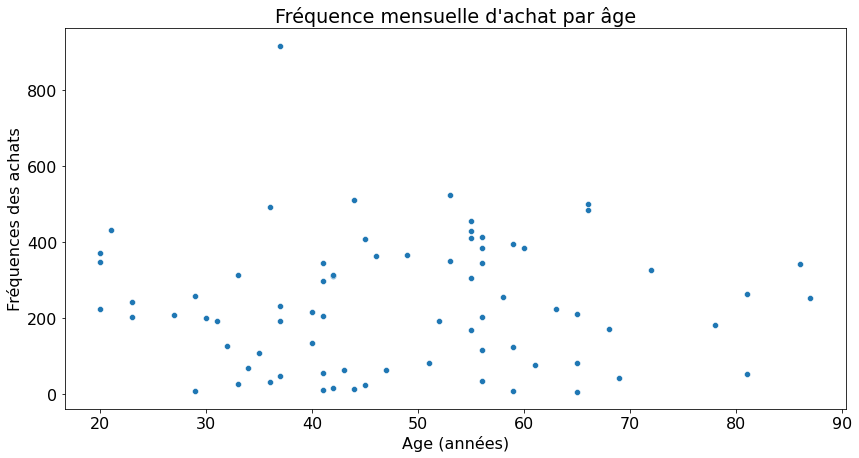

In [187]:
sns.scatterplot(x=achat_par_année_mois["age"], y=freq_par_age)
plt.ylabel("Fréquences des achats")
plt.xlabel("Age (années)")
plt.title("Fréquence mensuelle d'achat par âge")
plt.show()

Pas grand chose à dire... Il n'y a pas une tendance qui se dégage et saute aux yeux. Utilisons le module stats afin de faire un test de spearman.

In [278]:
stats.spearmanr(freq_mensu["age"], freq_mensu["session_id"])

SpearmanrResult(correlation=0.17057816414195284, pvalue=2.4186092522779325e-54)

 Ce que nous induque le Test c'est que l'hypothèse H0 est rejettée très clairement ( p-value très inférieure à 5% mais que la corrélation est très faible.

# Existe t-il un lien entre la taille du panier moyen et l'age ?

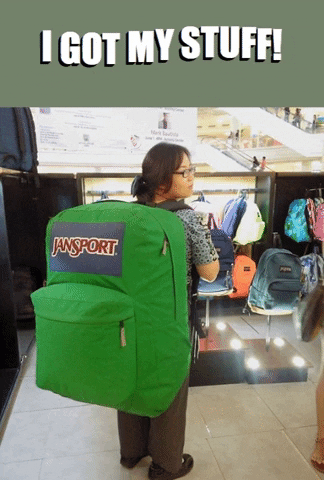

Avant de s'interesser au lien entre la taille du panier moyen et l'age il faudra déterminer ce qu'est le panier moyen et comment le calculer .
Le panier moyen est défini par ce calcul : **Chiffres d'affaires / nombre de commandes**.
On aura besoin de d'abord calculer **le CA par age ( dont on dispose déjà )** puis le **nombre de commande par age**, pour ensuite diviser l'un par l'autre pour enfin appliquer un test statistique pour enfin pouvoir répondre à la question.

Commençons par le nombre d'achat par age 

In [195]:
nbr_achats_age = reelles_transactions.groupby(["age"])["session_id"].count()

Convertissons cette série en un df.

In [196]:
nbr_achats_age=nbr_achats_age.to_frame(name="Nbre achat par age").reset_index()

On vérifie

In [270]:
nbr_achats_age

age  Nbre achat par age
0  19.00               15149
1  20.00                4371
2  21.00                4587
3  22.00                4252
4  23.00                4415
..   ...                 ...
71 90.00                 327
72 91.00                 311
73 92.00                 170
74 93.00                 226
75 94.00                 201

[76 rows x 2 columns]

Prochaine étape la jointure ! 

In [197]:
panier_moyen_age = pd.merge(tot_ca_age, nbr_achats_age, on="age")

In [198]:
panier_moyen_age

age  CA par age  Nbre achat par age
0  19.00   609013.69               15149
1  20.00   178195.78                4371
2  21.00   184207.32                4587
3  22.00   178497.70                4252
4  23.00   165027.96                4415
..   ...         ...                 ...
71 90.00     5264.34                 327
72 91.00     5043.19                 311
73 92.00     2815.45                 170
74 93.00     4013.87                 226
75 94.00     3221.85                 201

[76 rows x 3 columns]

On créée une nouvelle colonne "Taille panier moyen" qui est la division du ca par age par le nombre d'achat par age 

In [202]:
panier_moyen_age["Taille panier moyen"]= panier_moyen_age["CA par age"]/ panier_moyen_age["Nbre achat par age"]
panier_moyen_age= panier_moyen_age[["age","Taille panier moyen"]]
panier_moyen_age

age  Taille panier moyen
0  19.00                40.20
1  20.00                40.77
2  21.00                40.16
3  22.00                41.98
4  23.00                37.38
..   ...                  ...
71 90.00                16.10
72 91.00                16.22
73 92.00                16.56
74 93.00                17.76
75 94.00                16.03

[76 rows x 2 columns]

Etant donné qu'il s'agit d'un Test d'association entre deux variables quantitatives nous utiliserons la test de Spearman .
Le rho de Spearman varie entre 1 et -1. S'il n'y a pas de relation entre les variable le rho sera égal à 0. Si le rho est negatif la relation l'est tout autant et inversement.
Pour determiner la force de la relation on regarde la valeur absolue (c'est à dire le chiffre sans le signe négatif ).

Ci dessou un tableau d'interpretation du rho de Spearman :

|\|ρ\|| Interpretation|
|-------|---------------|
|0.00 < 0.10| Negligeable|
|0.10 < 0.20 |Faible|
|0.20 < 0.40| Moderé|
|0.40 < 0.60| Relativement fort|
|0.60 < 0.80| Fort|
|0.80 <= 1.00| Très fort|

On passe au test !

In [203]:
stats.spearmanr(panier_moyen_age["age"], panier_moyen_age["Taille panier moyen"])

SpearmanrResult(correlation=-0.08606971975393028, pvalue=0.45973921621954894)

On voit que la p value est bien supérieure à 5% on ne rejette pas l'hypothèse nulle. Il n'y a pas de lien. Mais lorsqu'on regarde le nuage de point ci-dessous on remarque des clusters. un remarque que les client de moins de 30 ans sont bien plus dépenciers que ceux de  moins de 50 ans.Enfin on remarque que le groupe de plus de 50 ans est un peu plus dépencier que les 30-50 ans. 

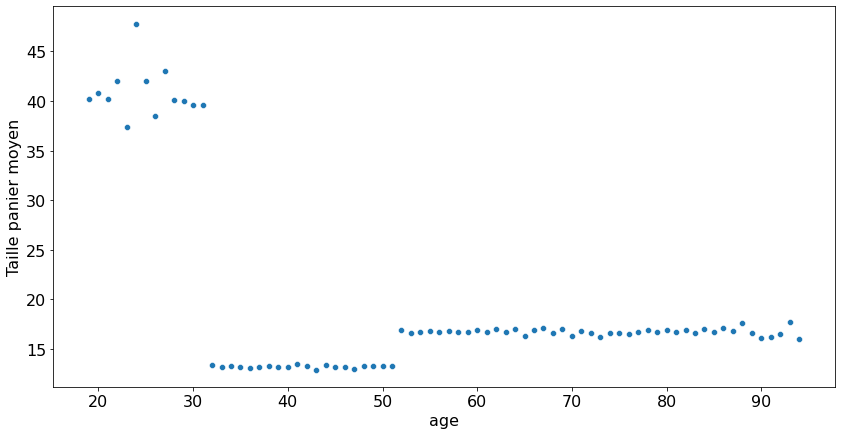

In [204]:
sns.scatterplot(data= panier_moyen_age, y= "Taille panier moyen", x ="age")
plt.show()

# Existe t-il un lien entre l'age et la catégorie de livre achetée ?

Ce qu'on peut voir c'est que les produit de catégorie 2 semblent attirer des personnes plus jeunes, lorqu'on s'interresse aux boites à moustaches ci dessous.

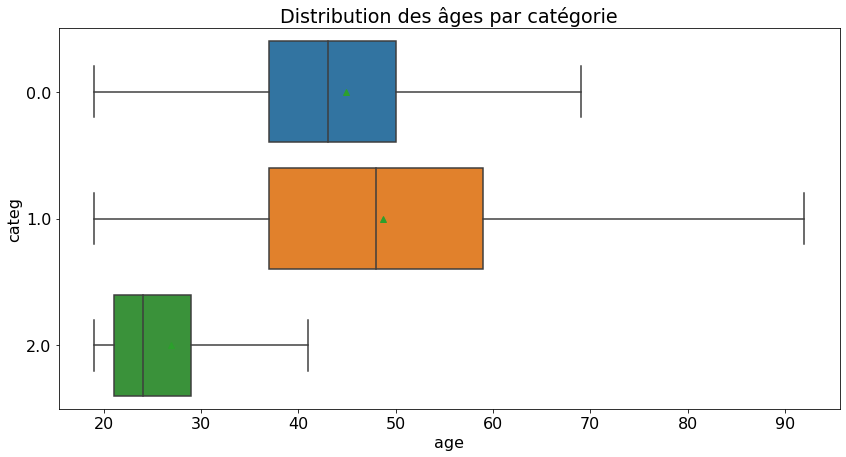

In [216]:
sns.boxplot(data=reelles_transactions, x='age', y='categ', orient='h', showfliers=False, showmeans=True)
plt.title('Distribution des âges par catégorie')
plt.show()

Pour répondre à cette interrogation on utilisera le test de Kruskal Walis.Car il s'agit de tester l'indépendance de variables ordinales (age) et nominales ( catégories ). 

In [249]:
pd.crosstab(reelles_transactions["age"],reelles_transactions["categ"])

categ  0.00  1.00  2.00
age                    
19.00  3418  5719  6012
20.00   909  1678  1784
21.00  1019  1723  1845
22.00   974  1550  1728
23.00  1116  1628  1671
...     ...   ...   ...
90.00   143   183     1
91.00   132   177     2
92.00    77    91     2
93.00    75   149     2
94.00    78   122     1

[76 rows x 3 columns]

Nous utiliserons scipy afin de procéder à ce test, on aura besoin des rang pour chaque catégories. Pour ce faire on créer une liste avec des booléens pour chaque catégorie

In [271]:
cat0 = reelles_transactions["categ"]== 0
cat1=reelles_transactions["categ"]== 1
cat2=reelles_transactions["categ"]== 2

On obtient une liste de booléens comme ci dessous, pour chaque variable.

In [272]:
cat0

0          True
24436      True
55326      True
141505     True
73894      True
          ...  
403201    False
647392    False
384115    False
185416     True
250493     True
Name: categ, Length: 679332, dtype: bool

Maintenant nous pouvons selectionner le score de chaque catégorie et les enregistrer séparement et effacer les valeurs manquantes.

In [260]:
catscore0 = reelles_transactions["age"][cat0].dropna()
catscore1= reelles_transactions["age"][cat1].dropna()
catscore2=reelles_transactions["age"][cat2].dropna()

Vérifions !

In [262]:
catscore0

0        56.00
24436    63.00
55326    35.00
141505   34.00
73894    67.00
          ... 
392676   37.00
381936   39.00
392915   46.00
185416   70.00
250493   42.00
Name: age, Length: 415680, dtype: float64

Nous pouvons maintenant procéder au test de Kruskal-Walis.

In [261]:
stats.kruskal(catscore0, catscore1, catscore2)

KruskalResult(statistic=79350.86927924873, pvalue=0.0)

On peut rejeter l'hypothèse nulle et conclure que toutes les médianes de population ne sont pas égales. on le voit très bien les produits de la catégorie 2 attirent des consommateurs plus jeunes !

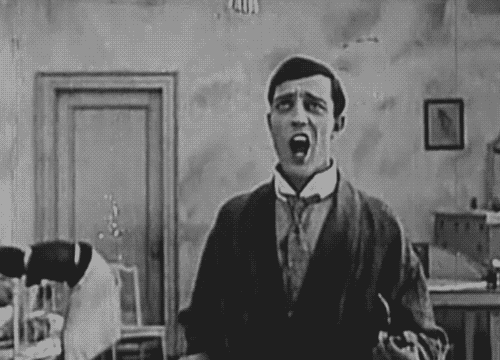